Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rainfall_mm         1000 non-null   int64  
 1   River_Level_m       1000 non-null   float64
 2   Soil_Moisture_%     1000 non-null   float64
 3   Temperature_C       1000 non-null   float64
 4   Population_Density  1000 non-null   int64  
 5   Flood               1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB
None

Dataset Summary:
       Rainfall_mm  River_Level_m  Soil_Moisture_%  Temperature_C  \
count   1000.00000    1000.000000      1000.000000    1000.000000   
mean     250.68300       7.457887        55.012419      27.520239   
std      141.79995       4.365481        25.814015       7.262793   
min        0.00000       0.069480        10.140859      15.000291   
25%      133.75000       3.531597        33.165960      21.258504   
5

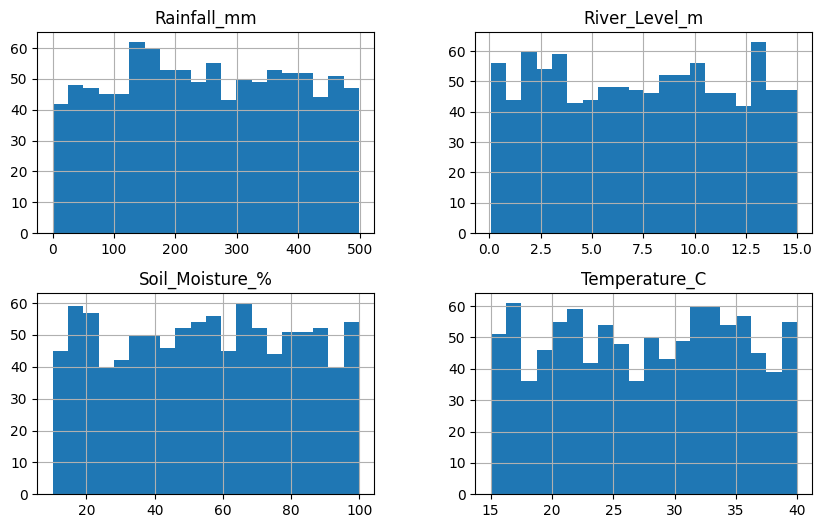

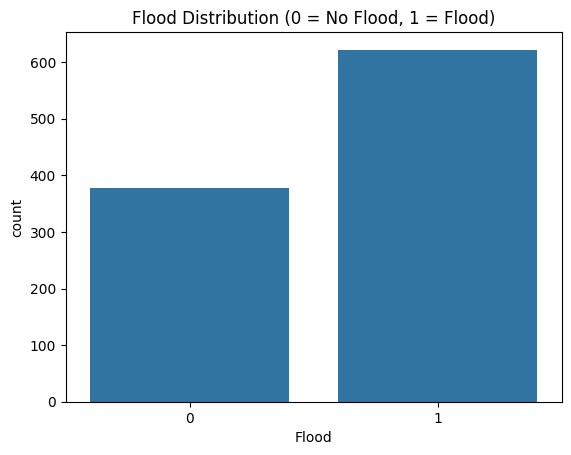

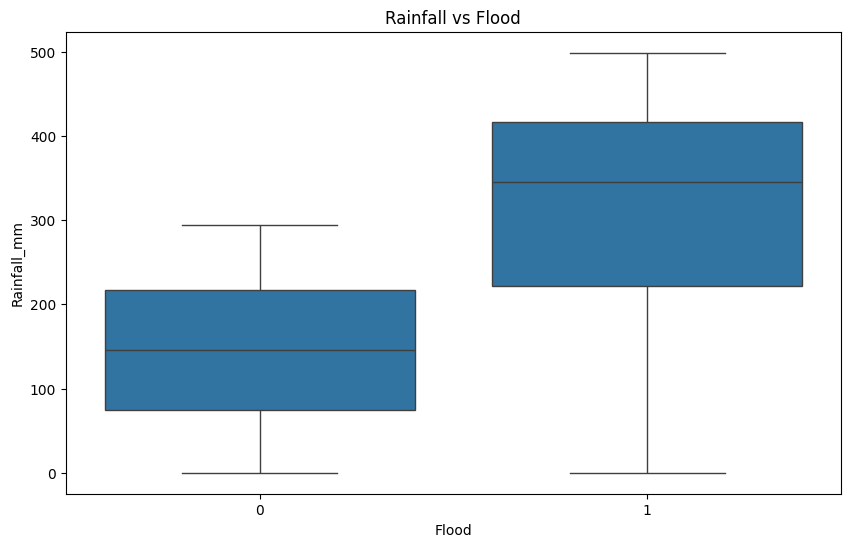

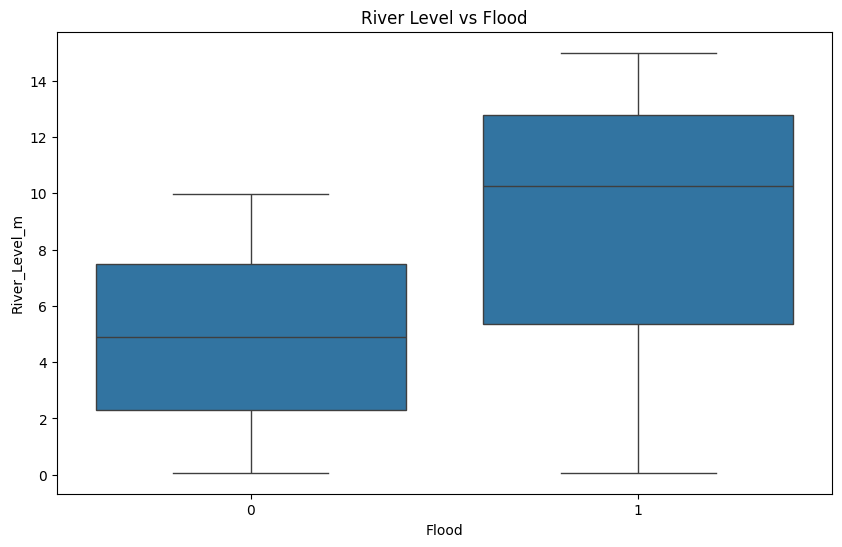

   Flood  Flood_Code
0      0           0
1      1           1
2      1           1
3      1           1
4      1           1


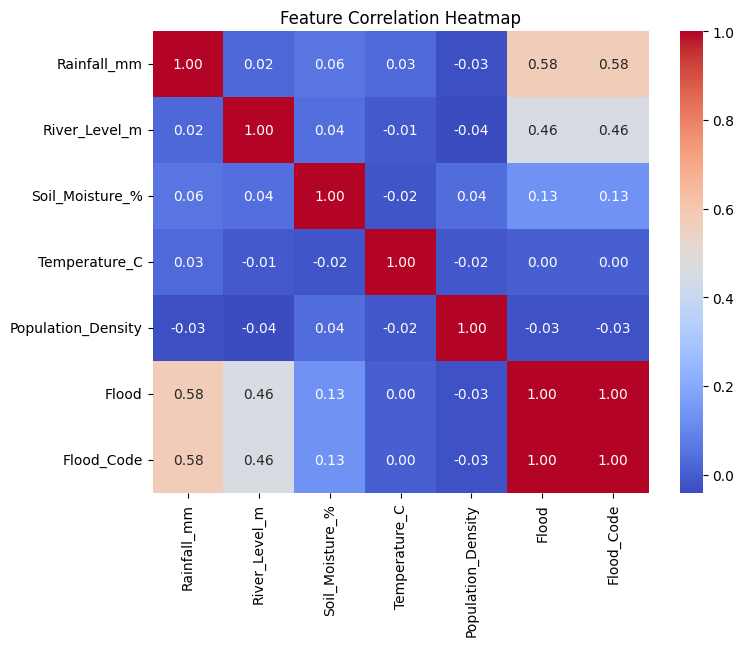

X shape: (1000, 5)
y shape: (1000,)


In [7]:
import pandas as pd

# Load dataset (make sure flood_dataset.csv is in the same folder)
df = pd.read_csv("flood_dataset.csv")

# Explore dataset
print("Dataset Info:")
print(df.info())
print("\nDataset Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())




# ======================
# Week 2: Exploratory Data Analysis (EDA)
# ======================

import matplotlib.pyplot as plt
import seaborn as sns

# First few rows
print(df.head())

# Distribution of numerical features
df[['Rainfall_mm', 'River_Level_m', 'Soil_Moisture_%', 'Temperature_C']].hist(figsize=(10,6), bins=20)
plt.show()

# Flood distribution
sns.countplot(x='Flood', data=df)
plt.title("Flood Distribution (0 = No Flood, 1 = Flood)")
plt.show()

# Relationship: City-wise plot skipped since dataset has no City column
# Instead, check how Flood relates to rainfall and river level
plt.figure(figsize=(10,6))
sns.boxplot(x='Flood', y='Rainfall_mm', data=df)
plt.title("Rainfall vs Flood")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Flood', y='River_Level_m', data=df)
plt.title("River Level vs Flood")
plt.show()


# ======================
# Week 2: Data Transformation
# ======================

# Handle missing values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode Flood (already 0/1 so no mapping needed, but keep for clarity)
df['Flood_Code'] = df['Flood'].map({0:0, 1:1})

print(df[['Flood', 'Flood_Code']].head())


# ======================
# Week 2: Feature Selection (Correlation)
# ======================

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Example: Select important features
X = df[['Rainfall_mm', 'River_Level_m', 'Soil_Moisture_%', 'Temperature_C', 'Population_Density']]
y = df['Flood_Code']

print("X shape:", X.shape)
print("y shape:", y.shape)
